## Unsupervised clustering for identifying spatial inhomogeneity on local electronic structures
Hideaki Iwasawa, Tetsuro Ueno, Takahiko Masui, Setsuko Tajima

Correspondence should be addressed to H.I. (iwasawa.hideaki@qst.go.jp)

# Part 2-2: Evaluation of k-means clustering

- Module Setting


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from gap_statistic import OptimalK
import time

- Load iEDCs or iADCs, if you prepared in "Part 1" in advance
- Select and run only one of two (target map will be updated by the last run)

In [2]:
%store -r iEDCs
%store -r eng
targetMap = iEDCs
slice_axis = eng
sn = np.shape(eng)[0]

In [3]:
%store -r iADCs
%store -r ang
targetMap = iADCs
slice_axis = ang
sn = np.shape(ang)[0]

## (2-2-i) Elbow curve

- Main body

In [3]:
t1 = time.time() 

max_nk = 10
sse = np.zeros(max_nk)
xsse = np.zeros(max_nk)

for i in range(max_nk):
    curnk = i + 1 
    km = KMeans(n_clusters=curnk, init='random', n_init=10, max_iter=100, random_state=0)
    km_model = km.fit(targetMap)
    sse[i] = km_model.inertia_ # inertia corresponds to sse
    xsse[i] = curnk

t2 = time.time()
elapsed_time = t2-t1
print('Elapsed Time: ', elapsed_time)

D:\Program\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Elapsed Time:  2.53023099899292


- Plotting

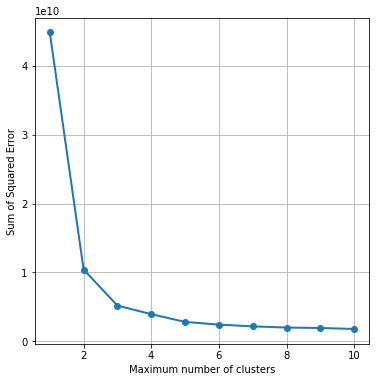

In [4]:
plt.figure(figsize=(6,6))
plt.plot(xsse, sse, marker="o",linewidth=2)
plt.grid(True)
plt.xlabel('Maximum number of clusters')
plt.ylabel('Sum of Squared Error')
plt.show()

## (2-2-ii) Silhouette Score

- Main body

In [5]:
t1 = time.time() 

max_nk = 10
silhouette_scores = np.zeros(max_nk-1)
xsilhouette_scores = np.zeros(max_nk-1)

for i in range(max_nk-1):
    curnk = i + 2
    km = KMeans(n_clusters=curnk, init='random', n_init=10, max_iter=100, random_state=0)
    km_model = km.fit(targetMap)
    km_labels = km_model.labels_
    silhouette_scores[i] = silhouette_score(targetMap, km_labels)
    xsilhouette_scores[i] = curnk

t2 = time.time()
elapsed_time = t2-t1
print('Elapsed Time: ', elapsed_time)

Elapsed Time:  3.0688562393188477


- Plotting

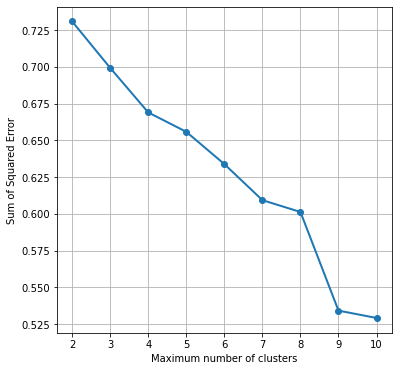

In [6]:
plt.figure(figsize=(6,6))
plt.plot(xsilhouette_scores, silhouette_scores, marker="o",linewidth=2)
plt.grid(True)
plt.xlabel('Maximum number of clusters')
plt.ylabel('Sum of Squared Error')
plt.show()

## (2-2-iii) Gap Statistics

- Main body<br>
If you had a problem while performing gap-stat with parallelization process,<br>
replace "optimalK = OptimalK(n_jobs=-1, parallel_backend='rust')" to "optimalK = OptimalK()".

In [7]:
# n_jobs : maximum number of parallel jobs
# -1 means all the number of CPUs
t1 = time.time() 

max_nk = 10
optimalK = OptimalK(n_jobs=-1, parallel_backend='rust')
n_clusters = optimalK(targetMap, n_refs=50, cluster_array=np.arange(1, max_nk+1))

km_gs_gapval = optimalK.gap_df["gap_value"].to_numpy()
km_gs_diff = optimalK.gap_df["diff"].to_numpy()
km_gs_cls = optimalK.gap_df["n_clusters"].to_numpy()

t2 = time.time()
elapsed_time = t2-t1
print('Elapsed Time: ', elapsed_time)

Elapsed Time:  94.83408880233765


- Plotting

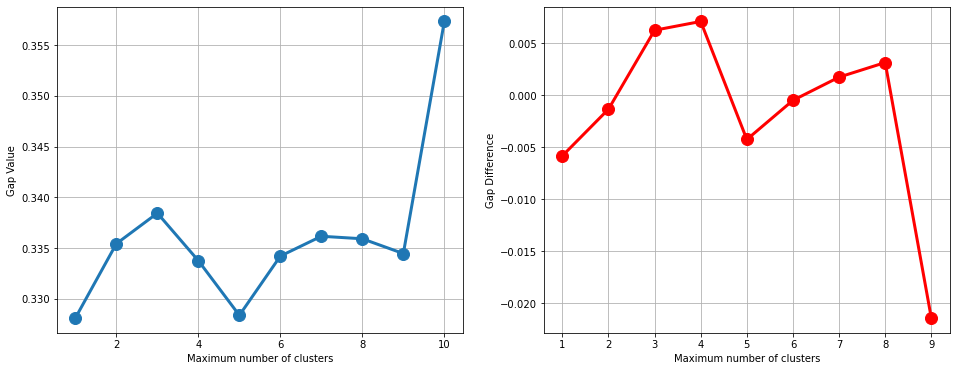

In [8]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 2, 1, xlabel='Maximum number of clusters', ylabel='Gap Value')
ax2 = fig.add_subplot(1, 2, 2, xlabel='Maximum number of clusters', ylabel='Gap Difference')
ax1.plot(km_gs_cls, km_gs_gapval, linewidth=3, marker="o", markersize=12)
ax2.plot(km_gs_cls, km_gs_diff, linewidth=3, marker="o", markersize=12, color='r')
ax1.grid(True)
ax2.grid(True)
plt.subplots_adjust(hspace=1)
plt.show()

## (2-2-iv) Output

- Save Directory

In [9]:
# default is to create "out" folder in the current directory, if not exist
import os
savedir = './out/'
if os.path.isdir(savedir) == False:
    os.mkdir(savedir)

- Elbow curve

In [10]:
np.savetxt(savedir+'km_sse.txt', sse, delimiter='\r\n')
np.savetxt(savedir+'xkm_sse.txt', xsse, delimiter='\r\n')

- Silhouette Score

In [11]:
np.savetxt(savedir+'silhouette_scores.txt', silhouette_scores, delimiter='\r\n')
np.savetxt(savedir+'xsilhouette_scores.txt', xsilhouette_scores, delimiter='\r\n')

- Gap Statistics

In [12]:
np.savetxt(savedir+'km_gs_gapval.txt', km_gs_gapval, delimiter='\r\n')
np.savetxt(savedir+'km_gs_diff.txt', km_gs_diff, delimiter='\r\n')
np.savetxt(savedir+'km_gs_cls.txt', km_gs_cls, delimiter='\r\n')